In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2022-04-14 13:20:39.399169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-14 13:20:39.399202: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
type(x_train)

numpy.ndarray

array pointer = 78
x_train[78] shape: (28, 28)
label: 1


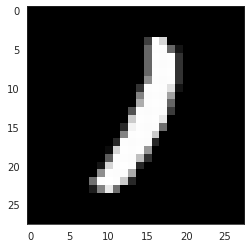

In [7]:
pointer = 78

print(f"array pointer = {pointer}")
print(f"x_train[{pointer}] shape: {x_train[pointer].shape}")
print(f"label: {y_train[pointer]}")

plt.imshow(x_train[pointer],cmap='gray')
plt.show()


In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

array pointer = 72
x_train[72] shape: (28, 28)
label: 1


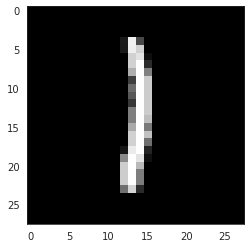

In [9]:
pointer = 72

print(f"array pointer = {pointer}")
print(f"x_train[{pointer}] shape: {x_train[pointer].shape}")
print(f"label: {y_train[pointer]}")

plt.imshow(x_train[pointer],cmap='gray')
plt.show()


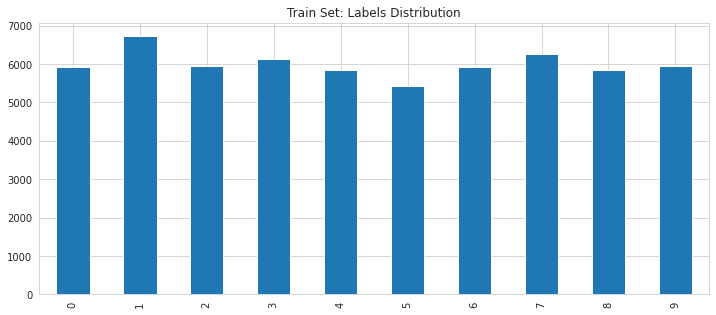

In [10]:
sns.set_style('whitegrid')
pd.Series(data=y_train).value_counts().sort_index().plot(kind='bar',figsize=(12,5))
plt.title("Train Set: Labels Distribution")
plt.show()

In [11]:
import itertools
import random

def image_montage_data_as_array(X, y,label_to_display, nrows, ncols, figsize=(15,10)):
  """
   The pseudo code for the function is:
  * Subset the label you are interested
  * If the label is not in the target array, shows montage with all labels
  * Check if your grid space is greater than the subset (nrows x ncols) size
  * Create list of axes indices based on nrows and ncols
  * Create a Figure and display images

  """
  sns.set_style("white")

  # subset the label you are interested to display
  if label_to_display in np.unique(y):
    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    df = X[boolean_mask]

  # if that label is not in the data, it shows an montage with all labels
  else:
    print("The class you selected doesn't exist.")
    print(f"The existing options are: {np.unique(y)}")
    print("Find below a montage with all labels")
    df = X

  # checks if your montage space is greater than subset size
  if nrows * ncols < df.shape[0]:
    img_idx = random.sample(range(0, df.shape[0]), nrows * ncols)
  else:
    print(
        f"Decrease nrows or ncols to create your montage. \n"
        f"There are {df.shape[0]} in your subset. "
        f"You requested a montage with {nrows * ncols} spaces")
    return
    
  # create list of axes indices based on nrows and ncols
  list_rows= range(0,nrows)
  list_cols= range(0,ncols)
  plot_idx = list(itertools.product(list_rows,list_cols))

  # create a Figure and display images
  fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
  for x in range(0,nrows*ncols):
    axes[plot_idx[x][0], plot_idx[x][1]].imshow(df[img_idx[x]], cmap='gray')
  plt.tight_layout()
  plt.show()


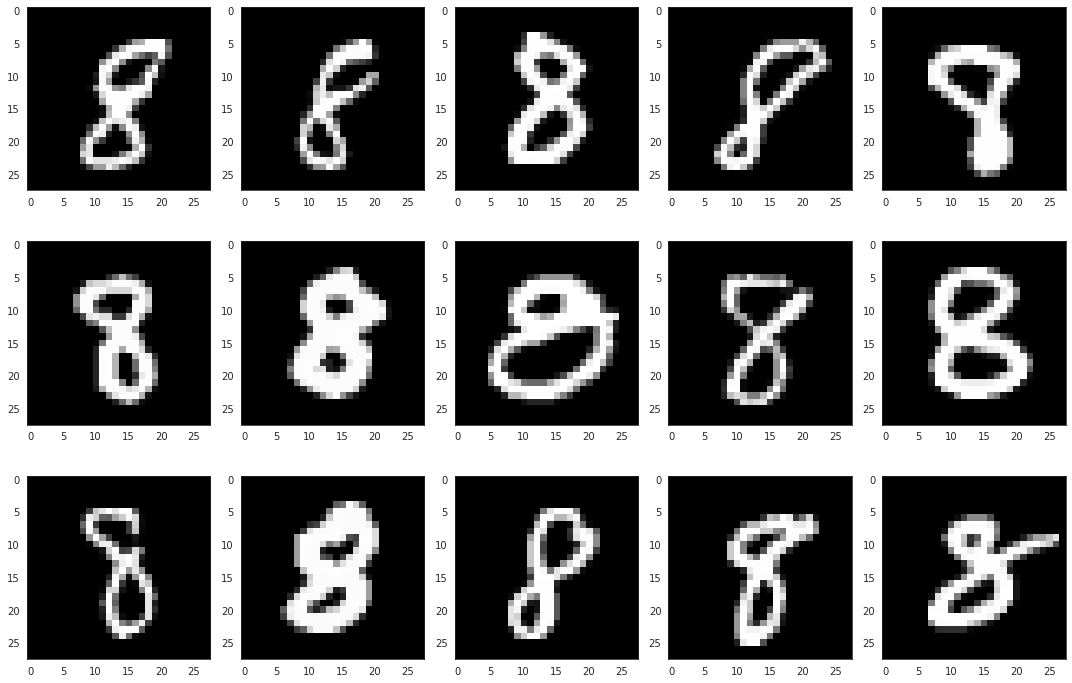

In [12]:
image_montage_data_as_array(X=x_train, y=y_train,
              label_to_display=8,
              nrows=3, ncols=5,
              figsize=(15,10))

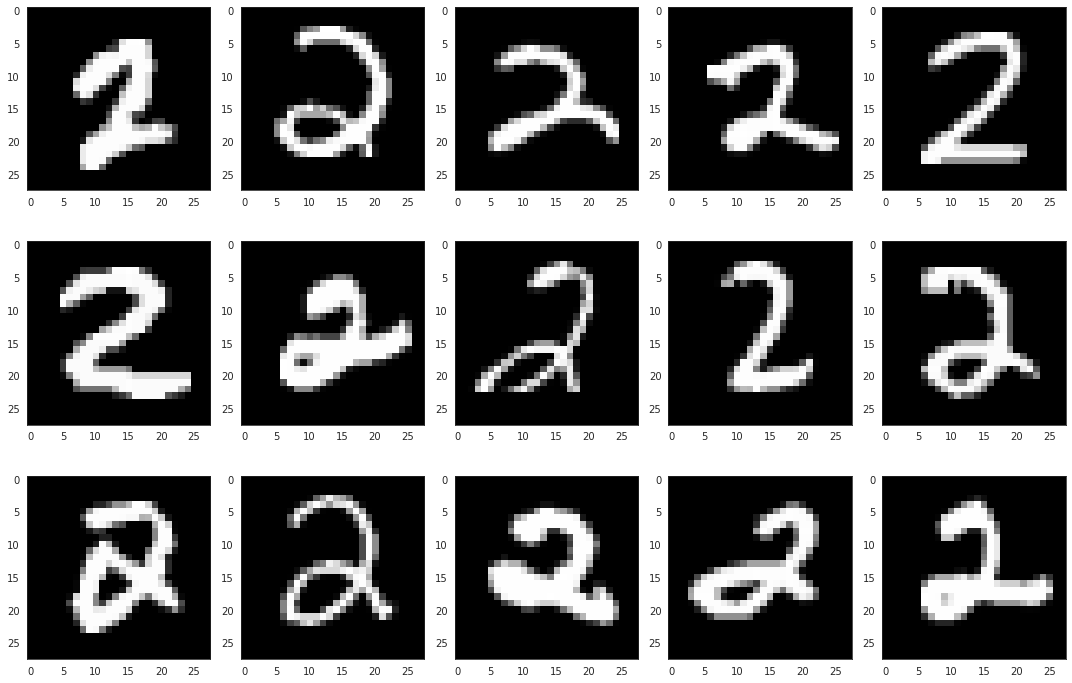

In [13]:
image_montage_data_as_array(X=x_train, y=y_train,
              label_to_display=2,
              nrows=3, ncols=5,
              figsize=(15,10))

In [14]:
from tensorflow.keras.datasets import fashion_mnist
(x_practice, y_practice), (x_practice_test, y_practice_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


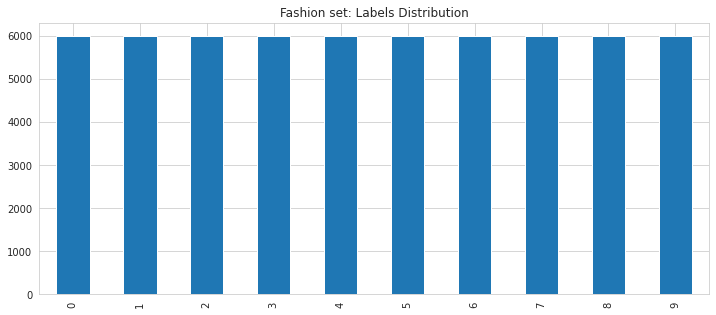

In [15]:
sns.set_style('whitegrid')
pd.Series(data=y_practice).value_counts().sort_index().plot(kind='bar',figsize=(12,5))
plt.title("Fashion set: Labels Distribution")
plt.show()

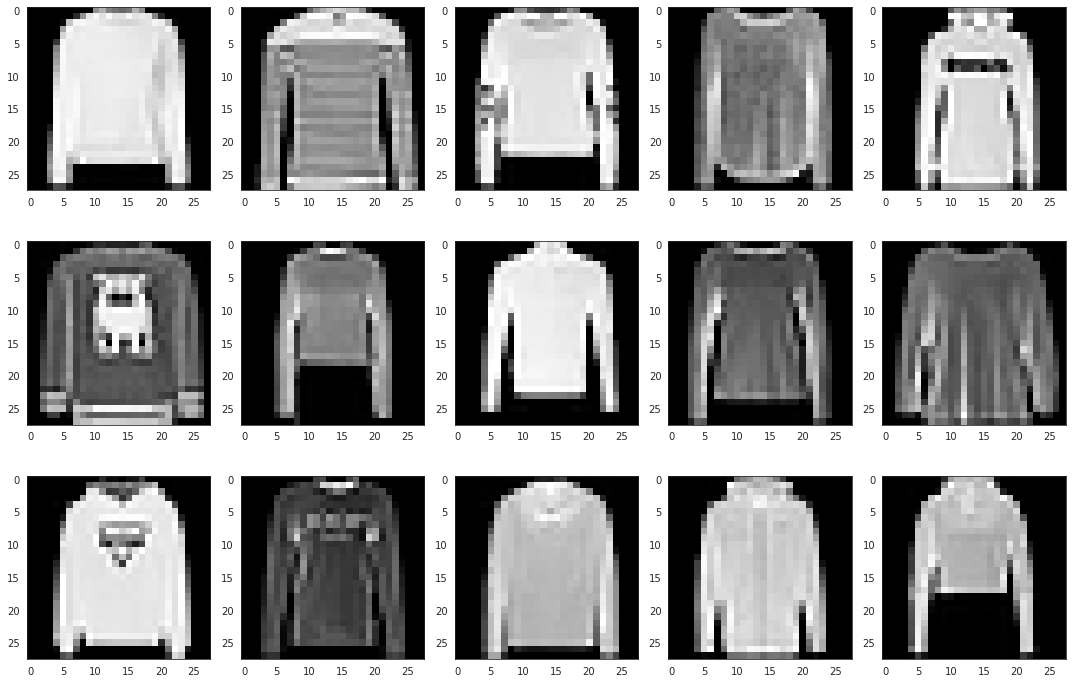

In [16]:
image_montage_data_as_array(X=x_practice, y=y_practice,
              label_to_display=2,
              nrows=3, ncols=5,
              figsize=(15,10))


In [17]:
def image_avg_and_variability_data_as_array(X, y, figsize=(12,5)):
  """
   The pseudo code for the function is:
  * Loop through all labels
  * Subset an array for a given label
  * Calculate the average and standard deviation
  * Create a Figure displaying average and variability image

  """
  sns.set_style("white")

  for label_to_display in np.unique(y):

    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    arr = X[boolean_mask]

    avg_img = np.mean(arr, axis = 0)
    std_img = np.std(arr, axis = 0)
    print(f"==== Label {label_to_display} ====")
    print(f"Image Shape: {avg_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label_to_display}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Image Variability for label {label_to_display}")
    axes[1].imshow(std_img, cmap='gray')
    plt.show()
    print("\n")

==== Label 0 ====
Image Shape: (28, 28)


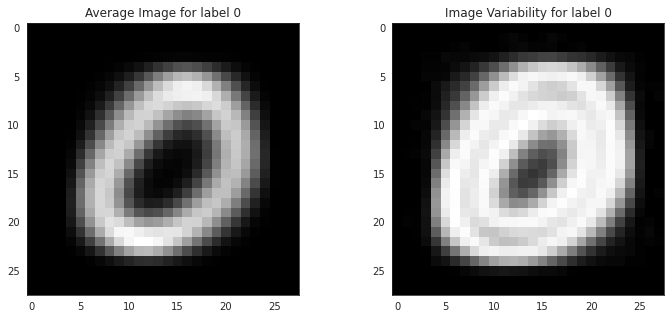



==== Label 1 ====
Image Shape: (28, 28)


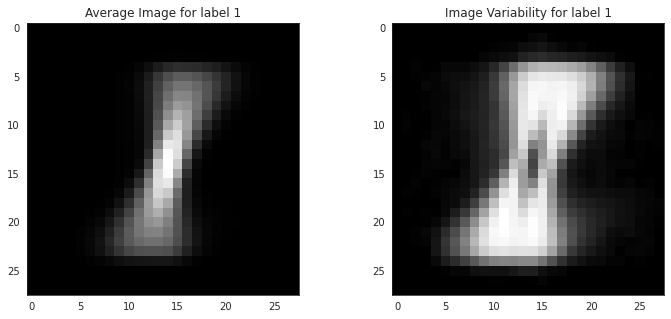



==== Label 2 ====
Image Shape: (28, 28)


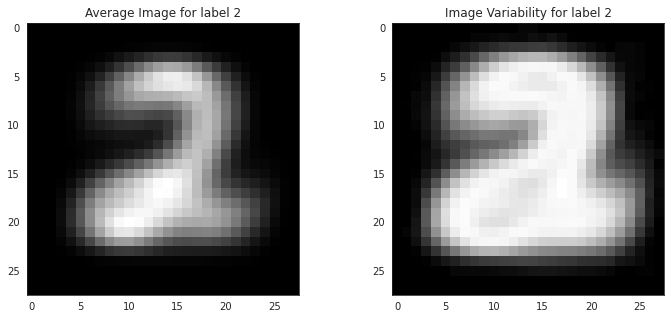



==== Label 3 ====
Image Shape: (28, 28)


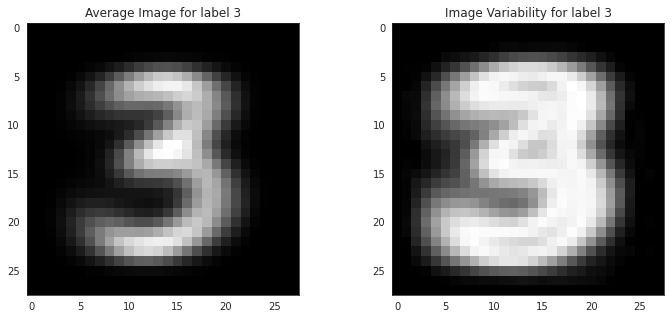



==== Label 4 ====
Image Shape: (28, 28)


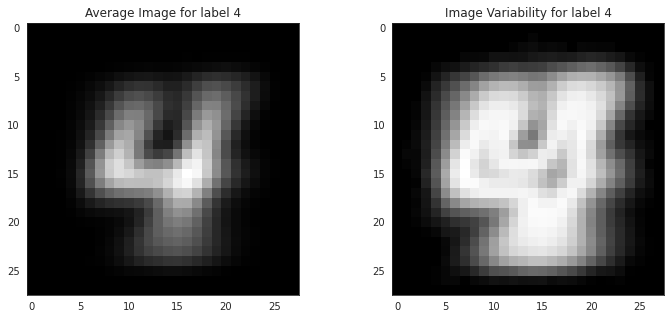



==== Label 5 ====
Image Shape: (28, 28)


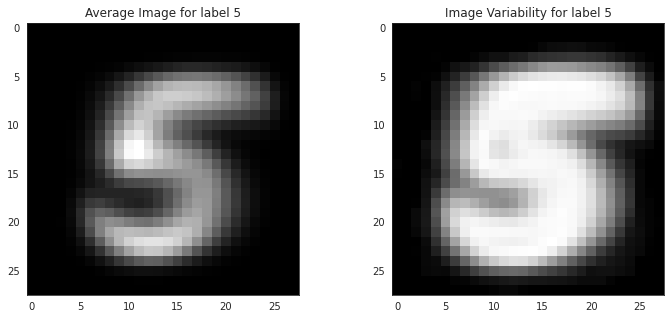



==== Label 6 ====
Image Shape: (28, 28)


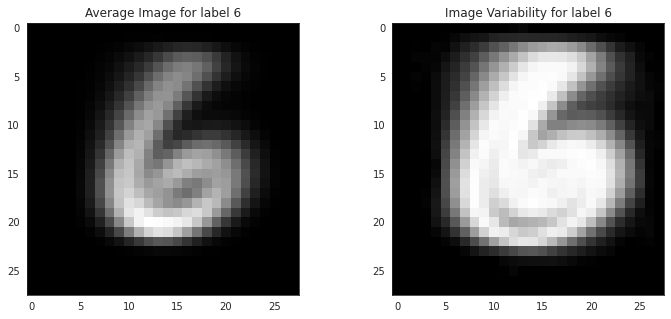



==== Label 7 ====
Image Shape: (28, 28)


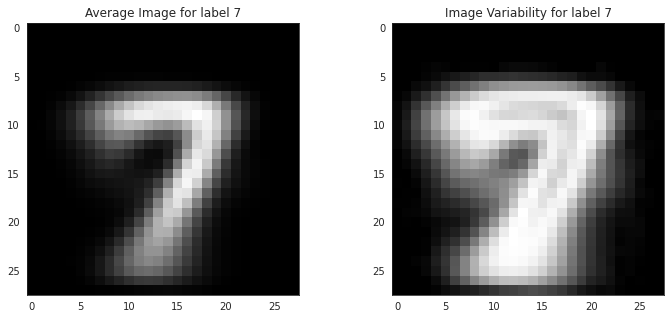



==== Label 8 ====
Image Shape: (28, 28)


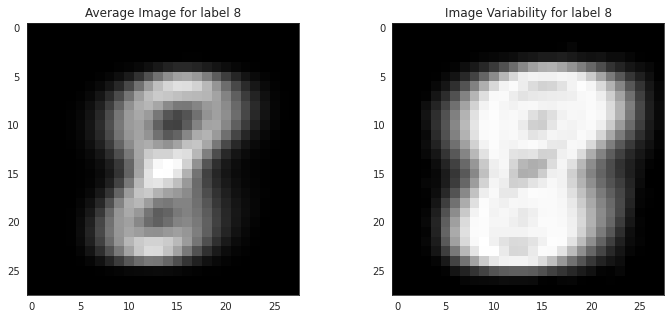



==== Label 9 ====
Image Shape: (28, 28)


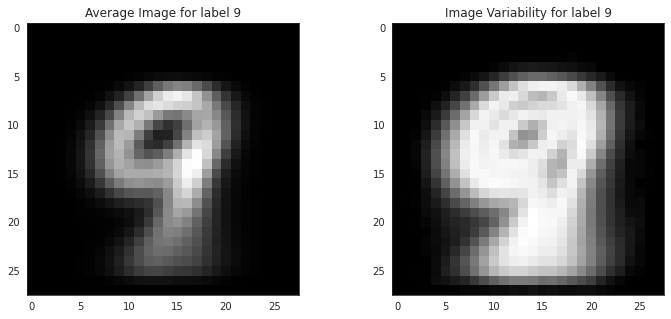

In [18]:
image_avg_and_variability_data_as_array(X=x_train, y=y_train, figsize=(12,5))

In [19]:
def subset_image_label(X,y,label_to_display):
  y = y.reshape(-1,1,1)
  boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
  df = X[boolean_mask]
  return df

def contrast_between_2_labels_data_as_array(X, y, label_1, label_2, figsize=(12,5)):
  sns.set_style("white")

  if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
    print(f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
    return

  # calculate mean from label1
  images_label = subset_image_label(X, y, label_1)
  label1_avg = np.mean(images_label, axis = 0)

  # calculate mean from label2
  images_label = subset_image_label(X, y, label_2)
  label2_avg = np.mean(images_label, axis = 0)

  # calculate difference and plot difference, avg label1 and avg label2
  contrast_mean = label1_avg - label2_avg
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
  axes[0].imshow(contrast_mean, cmap='gray')
  axes[0].set_title(f'Difference Between Averages: {label_1} & {label_2}')
  axes[1].imshow(label1_avg, cmap='gray')
  axes[1].set_title(f'Average {label_1}')
  axes[2].imshow(label2_avg, cmap='gray')
  axes[2].set_title(f'Average {label_2}')
  plt.show()


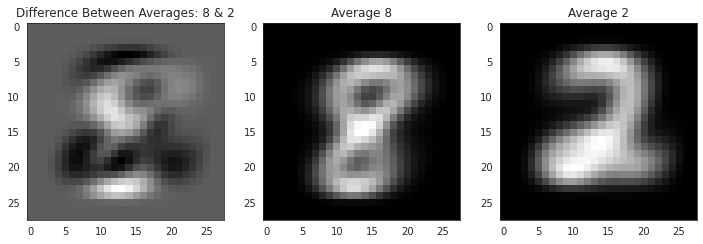

In [20]:
contrast_between_2_labels_data_as_array(X=x_train, y=y_train,
                                        label_1=8, label_2=2,
                                        figsize=(12,10)
                                        )

==== Label 0 ====
Image Shape: (28, 28)


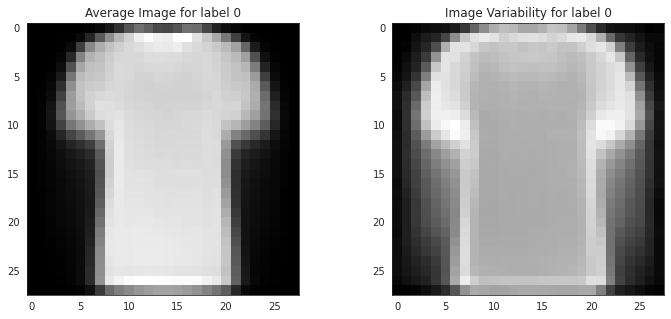



==== Label 1 ====
Image Shape: (28, 28)


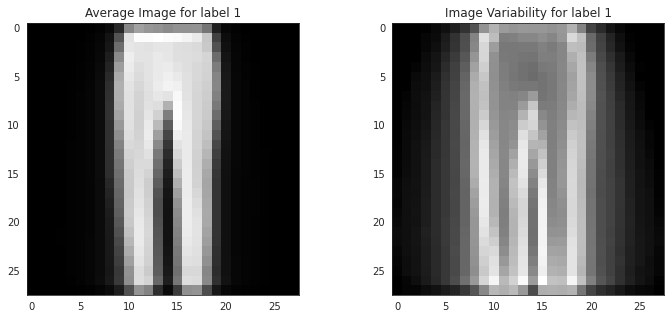



==== Label 2 ====
Image Shape: (28, 28)


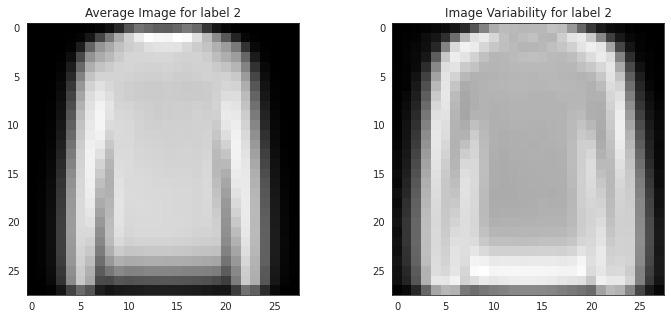



==== Label 3 ====
Image Shape: (28, 28)


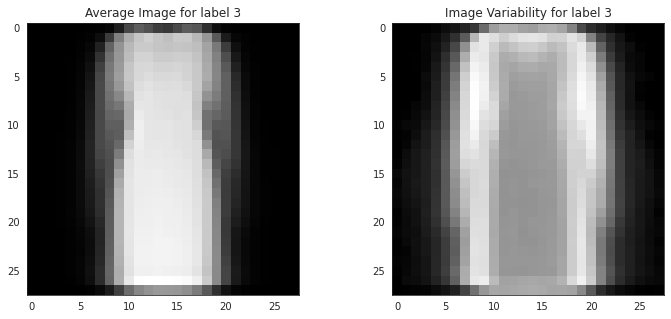



==== Label 4 ====
Image Shape: (28, 28)


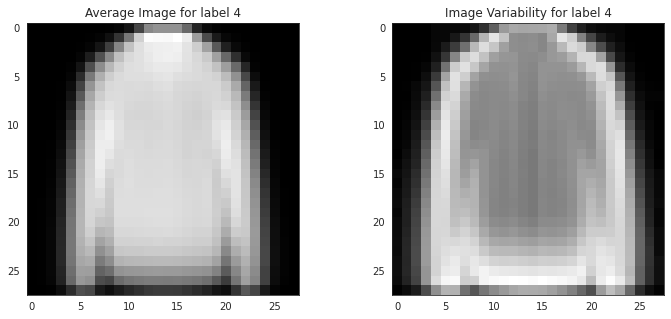



==== Label 5 ====
Image Shape: (28, 28)


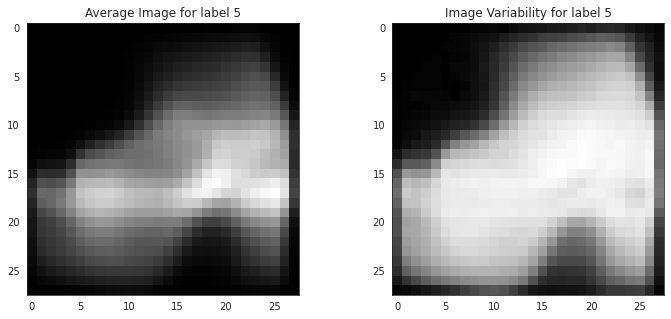



==== Label 6 ====
Image Shape: (28, 28)


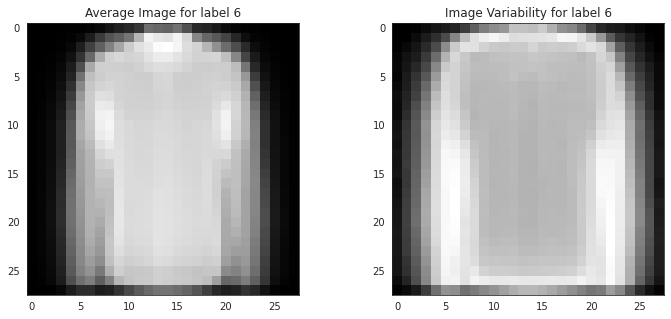



==== Label 7 ====
Image Shape: (28, 28)


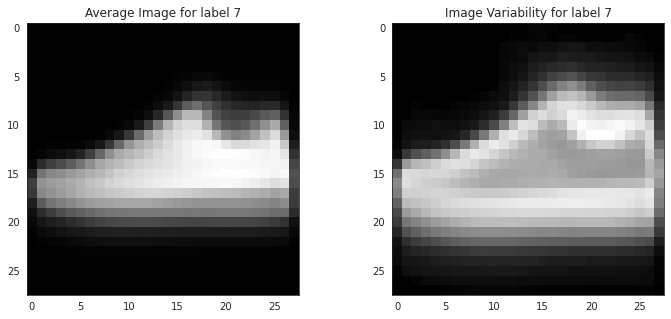



==== Label 8 ====
Image Shape: (28, 28)


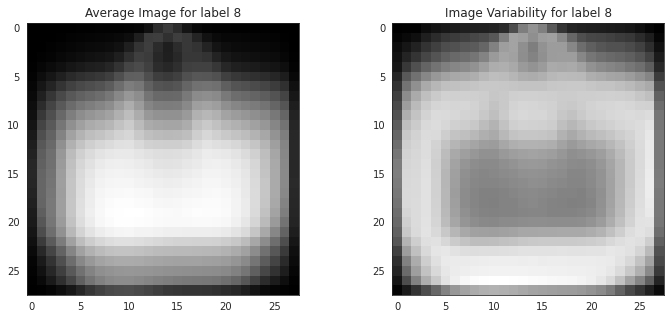



==== Label 9 ====
Image Shape: (28, 28)


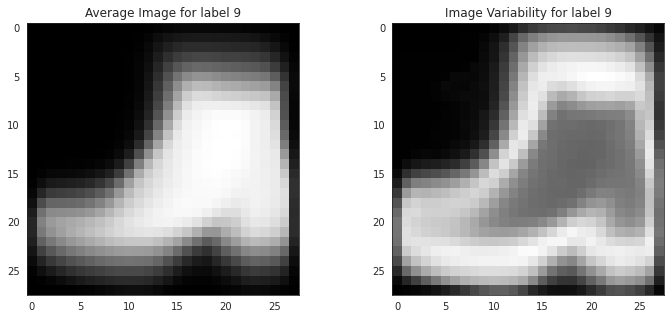

In [21]:
image_avg_and_variability_data_as_array(X=x_practice, y=y_practice, figsize=(12,5))

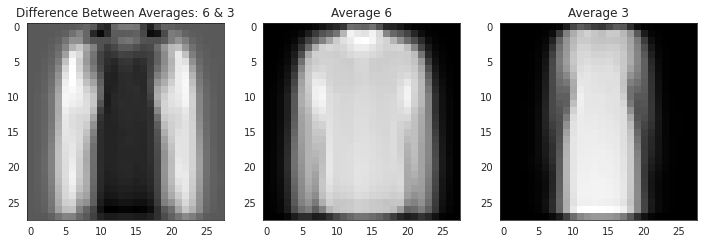

In [22]:
contrast_between_2_labels_data_as_array(X=x_practice, y=y_practice,
                                        label_1=6, label_2=3,
                                        figsize=(12,10)
                                        )